# SVM 연구과제

## 문제 1

위스콘신 유방암 데이터셋과 타이타닉 탑승자 데이터 셋, 사과의 품질 분류 데이터셋을 나이브베이즈 알고리즘으로 분류 분석을 수행하고 로지스틱, KNN, SVM의 경우와 결과를 비교하시오.

각 데이터셋에 어떤 알고리즘을 적용하는 것이 더 좋은 성능을 기대할 수 있는지 결론을 내시오.

- 위스콘신 유방암 데이터 셋: 수업 내용과 동일하게 전처리
- 타이타닉 데이터 셋 : 수업 내용과 동일하게 전처리
- 사과의 품질 분류 데이터 셋: 스케일링 외에 별다른 전처리 과정 없음


## 문제 2

아래의 데이터셋은 UCI Machine Learning 저장소에서 제공하는 버섯에 대한 데이터 셋이다.

이 데이터셋은 모든 변수에 대해 라벨링을 수행해야 한다.

이 데이터셋을 사용하여 식용 버섯과 독버섯을 구분할 수 있는 분류 모형을 구현하시오.

어떤 알고리즘을 사용하는 것이 가장 적합할지 결론을 제시하시오.

> https://data.hossam.kr/mldata/mushrooms.xlsx

> https://www.kaggle.com/datasets/uciml/mushroom-classification

| 변수 | 설명 |
|---|---|
| class | p-독성, e-식용 |
| cap-shape | 버섯의 모자 모양(bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s) |
| cap-surface | 버섯의 모자 표면(fibrous=f, grooves=g, scaly=y, smooth=s) |
| cap-color | 버섯의 모자 색상 |
| bruises | 버섯에 멍이 들었는지 여부(bruises=t, no=f) |
| odor | 버섯의 냄새 |
| gill-attachment | 버섯의 주름 부착 방식(attached=a, descending=d, free=f, notched=n). |
| gill-spacing | 주름 사이의 간격(close=c, crowded=w, distant=d) |
| gill-size | 주름 크기를 나타냅니다 (broad=b, narrow=n). |
| gill-color | 주름 색상 |
| stalk-shape | 줄기 모양(enlarging=e, tapering=t). |
| stalk-root | 줄기의 뿌리 부분 모양 |
| stalk-surface-above-ring | 반지 위의 줄기 표면 |
| stalk-surface-below-ring | 반지 아래의 줄기 표면 |
| stalk-color-above-ring | 반지 위의 줄기 색상 |
| stalk-color-below-ring | 반지 아래의 줄기 색상 |
| veil-type | 베일(버섯의 부속물)의 종류 |
| veil-color | 베일의 색상 |
| ring-number | 반지의 수(none=n, one=o, two=t). |
| ring-type | 반지의 종류 |
| spore-print-color | 포자 자국의 색상 |
| population | 개체군의 분포 형태 |
| habitat | 버섯이 자라는 환경 |

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

from sklearn.naive_bayes import GaussianNB

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
origin = my_read_excel('https://data.hossam.kr/mldata/mushrooms.xlsx')

my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df = origin.copy()

label = []
for i in range(len(df.columns)):
    label.append(df.columns[i])
label

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [4]:
df1 = my_labelling(df, *label)
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


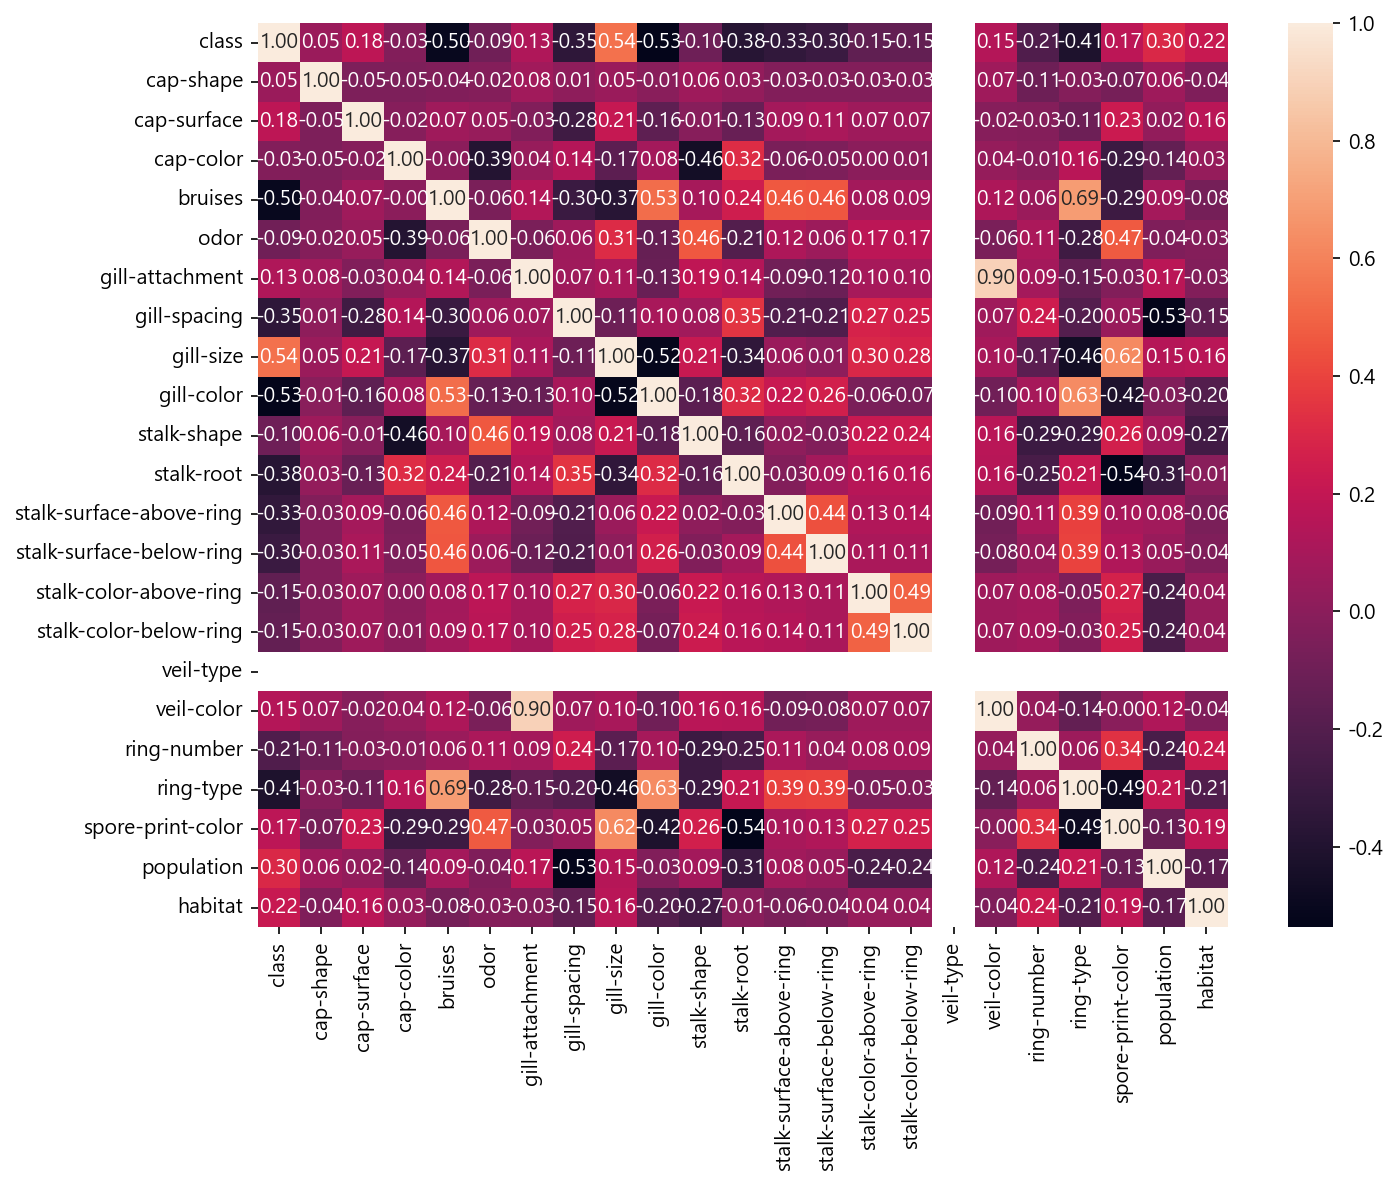

+----------------------------------------------------------+---------------+--------------+----------+
|                                                          |   correlation |      p-value | result   |
|----------------------------------------------------------+---------------+--------------+----------|
| ('class', 'cap-shape')                                   |     0.0529506 |   1.7951e-06 | True     |
| ('class', 'cap-surface')                                 |      0.178446 |  4.16672e-59 | True     |
| ('class', 'cap-color')                                   |    -0.0313841 |   0.00466921 | True     |
| ('class', 'bruises')                                     |      -0.50153 |            0 | True     |
| ('class', 'odor')                                        |    -0.0935516 |  2.92931e-17 | True     |
| ('class', 'gill-attachment')                             |        0.1292 |  1.39319e-31 | True     |
| ('class', 'gill-spacing')                                |     -0.34838

In [12]:
my_correlation(df1)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [7]:
x_train, x_test, y_train, y_test = my_train_test_split(df1, yname='class', test_size=0.2, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [8]:
estimator = GaussianNB(var_smoothing=1e-09)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  0.9227573472841976
검증데이터 점수:  0.9064615384615384


[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.922757 |     0.906462 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.913084 |     0.899215 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.929296 |     0.901575 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0834081 |    0.0892236 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.916592 |     0.910776 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.921119 |     0.900393 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.952267 |     0.938316 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

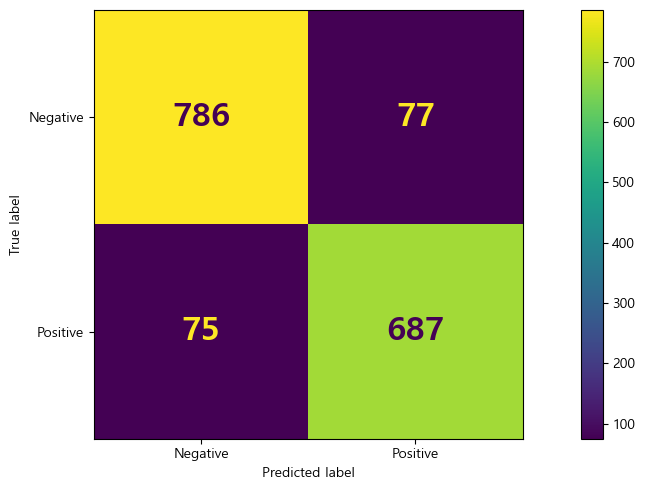


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


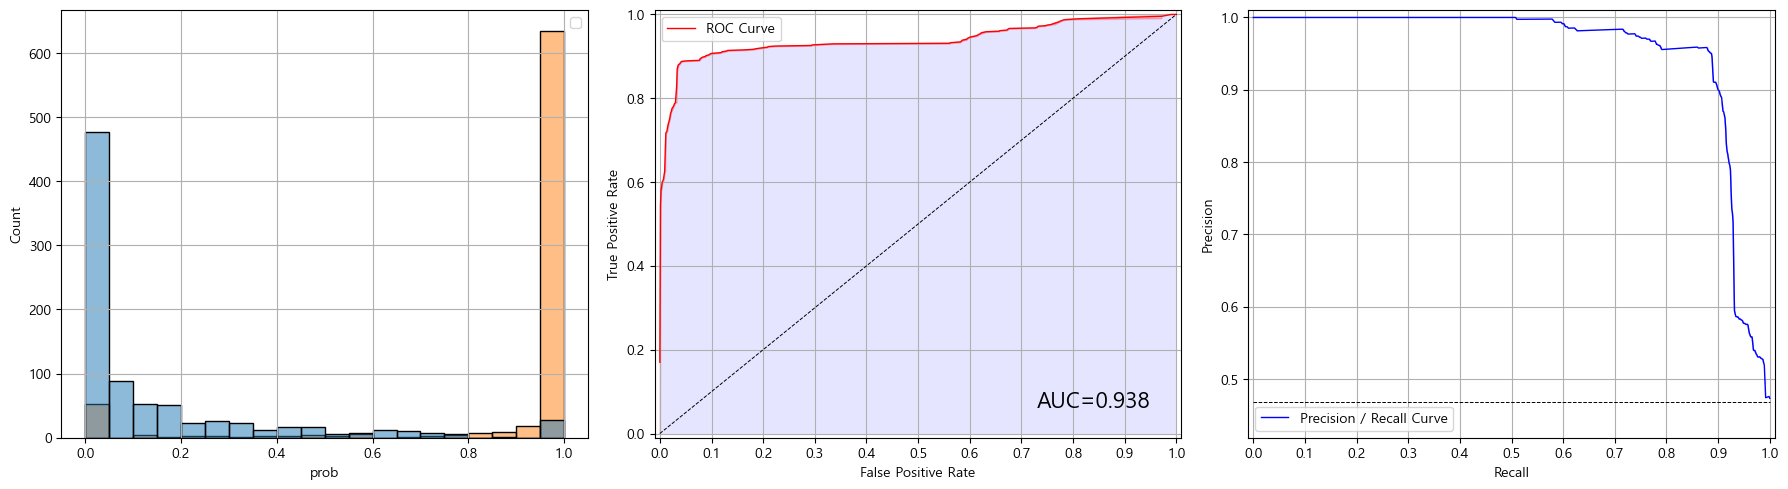


[학습곡선]


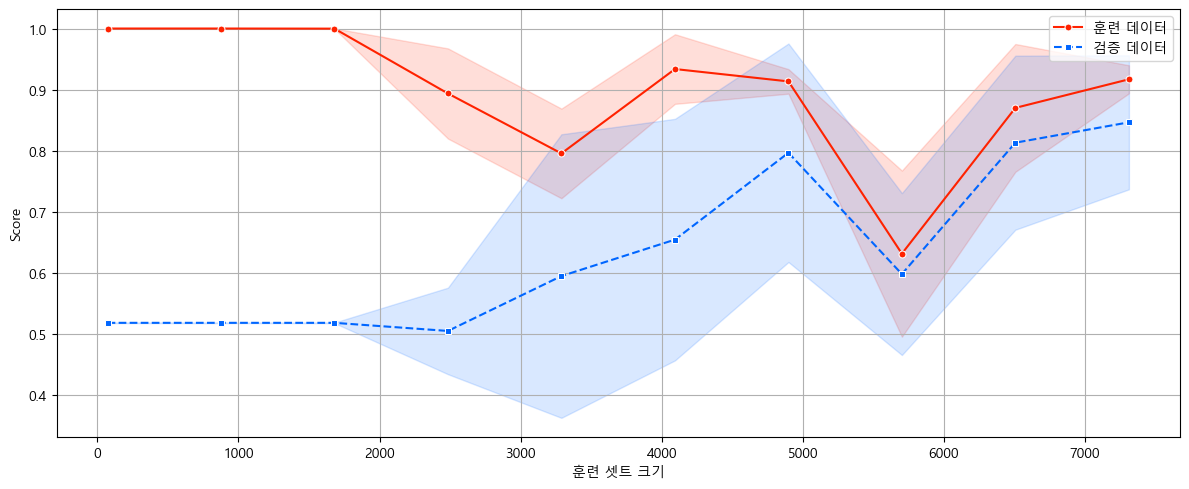

In [9]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)

### [4] 모든 모형에 대한 성능 비교

In [10]:
%%time
my_classification(x_train, y_train, x_test, y_test)

<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음
+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB           |                         0 |           0.906462 |            0.899215 |         0.901575 |           0.0892236 |      0.910776 |   0.900393 | 0.938316 |
| KNeighborsClassifier |                         0 |                  1 |                   1 |                1 |                   0 |             1 |          1 |        1 |
| LogisticRegression   |                  0.810826 |           0.961846 |      